# 1. import libraries
import all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
sns.set()
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


#### Please note that the code was developed on below versions of libraries 
* Python version -- 3.8
* Pandas version -- 1.1.3
* NumPy version -- 1.19.2
* Matplotlib -- 3.3.2
* stats models -- 0.12.0
* SciPy -- 1.5.2
* sklearn -- 0.23.2
##### If there is any error while running the code, please check the library version and install require version


In [2]:
print("Pandas Version: ", pd. __version__)
print("Numpy Version: ", np. __version__)
print("Statsmodels Version: ", sm. __version__)
print("Scipy Version: ", pd. __version__)
print("sklearn Version: ", sklearn. __version__)

Pandas Version:  1.4.2
Numpy Version:  1.21.5
Statsmodels Version:  0.13.2
Scipy Version:  1.4.2
sklearn Version:  1.0.2


In [3]:
# This command show all the rows and columns in dataframe
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### Read data from csv/excel/server based on availability
This code reads data from csv

In [4]:
data = pd.read_csv(r'C:\Users\Dell\OneDrive\Desktop\Linerar Regression Prediction V2\insurance_Data.csv')

# This will show top 5 rows of dataset
data.head()

,age,Gender,bmi,children,smoker,region,expenses
0,19.0,female,27.9,0,yes,southwest,16884.92
1,18.0,male,33.8,1,no,southeast,1725.55
2,28.0,male,33.0,3,no,southeast,4449.46
3,33.0,male,22.7,0,no,northwest,21984.47
4,32.0,male,28.9,0,no,northwest,3866.86


### Objective:
#### This model is developed to predict annual medical expenses of a person based on certain charcterstics so that the insurance companies can charge premium accordingly

### Data information:
* age - Age of the person (numeric)
* Gender - Gender of the person (binary: male or female)
* bmi - The body mass index (BMI) of the person (numeric)
* children - Number of children the person have (integer)
* smoker - Does the person smoke or not (binary: yes or no)
* region - Region the person belongs to (categorical)
* expenses - Annual medical expenses of the person (numeric)

# 2. Data Review and Checks

In [5]:
print(data.shape)

(1338, 7)


This dataset has rows=1338 and columns=7

In [6]:
numeric_col = list(data.select_dtypes(np.number))
print("Numerical Columns:",numeric_col)

categorical_col = list(data.select_dtypes(include= 'object'))
print("Categorical Columns:",categorical_col)

Numerical Columns: ['age', 'bmi', 'children', 'expenses']
Categorical Columns: ['Gender', 'smoker', 'region']


* Given data have 7 columns (6 independent variables or features and one dependent variable)
* Total 1338 observations are given in this data 
* There are 4 numerical variable including dependent variable (expenses) and 3 categorical variables


In [7]:
# It will provide count of non-Null and data type(int/float/object) for each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1332 non-null   float64
 1   Gender    1334 non-null   object 
 2   bmi       1334 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1334 non-null   object 
 5   region    1335 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


---
### 2.1 Descriptive statistics

In [8]:
# To describe numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1332.0,39.231982,14.057981,18.00,27.0000,39.00,51.000,64.00
bmi,1334.0,30.666492,6.105007,16.00,26.2250,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


It is used to make some basic inferences about data without analyze deeply. We can see min, max, mean, variance and quintile of data
* The age is varied in the range of 18 to 64 and the average age of people is 39.23 year.
* The BMI of the people vary in range 16 to 53 and the average BMI of the people is 30.6.
* The number of children of people vary in the range of 0 to 5.
* The expenses column values vary in range 1121 to 63770 and Average expense is 13270. The expenses column values are right skewed since mean is greater than the median value

### Train test split
* The data is divided in to parts train and test
* We will develop our model on train data and test the model using test data
* Developed model should be able to predict expenses in test data with same accuracy

Please note that train test split should be done before any outlier treatment and missing value imputation. The same process should be followed for test data.


In [9]:
x= data.drop('expenses', axis=1)
y= data['expenses']

# 70% of data is randomly selected for train and 30% kept for test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [10]:
# dataframe of train data
data0 = pd.concat([x_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis =1)

### Duplicate values

In [11]:
# Check duplicate values in dataset
data.duplicated().sum()

1

* One duplicate value present in this dataset

In [12]:
# Drop duplicates
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

### 2.2 Exploratory data analysis

<AxesSubplot:xlabel='Gender', ylabel='expenses'>

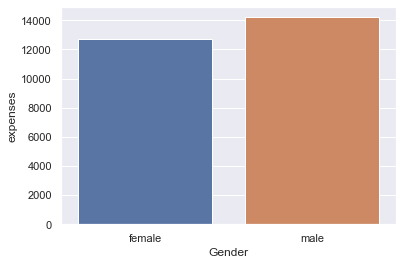

In [13]:
# Average expenses by gender
temp0 = data0.groupby('Gender', as_index=False)['expenses'].mean()

# plot
sns.barplot('Gender', 'expenses', data=temp0)

From above visualization, we can see female member tends to have slightly  high expense than male member

<AxesSubplot:xlabel='smoker', ylabel='expenses'>

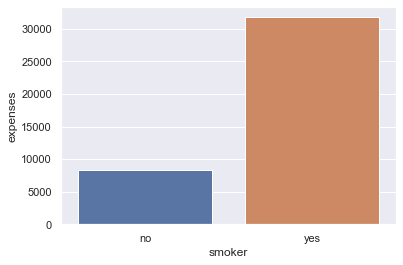

In [14]:
## Average expenses by smoker
temp0 = data0.groupby('smoker', as_index=False)['expenses'].mean()
# plot
sns.barplot('smoker', 'expenses', data=temp0)

For smoker column, can see who smokes are spending more than who doesn't smoke.

<AxesSubplot:xlabel='region', ylabel='expenses'>

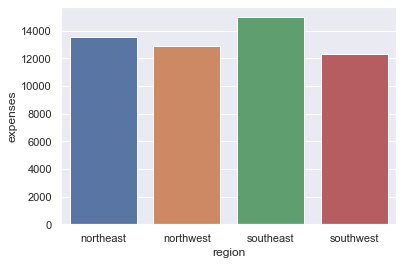

In [15]:
## Average expenses by region
temp0 = data0.groupby('region', as_index=False)['expenses'].mean()
# plot
sns.barplot('region', 'expenses', data=temp0)

* No observed strong trend in expenses with region.
* People from the southeast region have higher expenses compare to other regions.

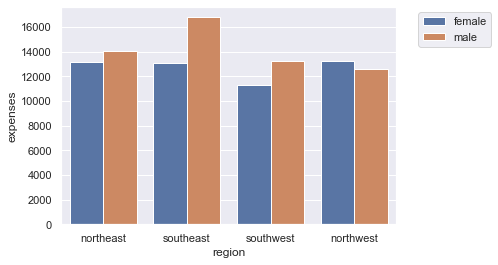

In [16]:
g =sns.barplot(x="region", y="expenses", hue="Gender", data=data0, ci=None)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

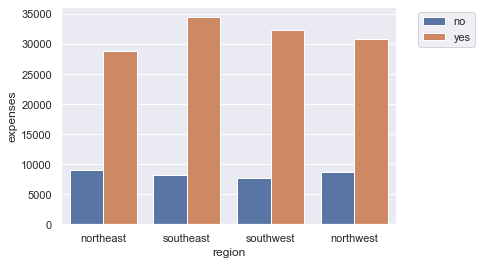

In [17]:
g =sns.barplot(x="region", y="expenses", hue="smoker",data=data0, ci=None)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

* According to above plots we found that male customers and smokers pay more insurance premium.
* And southeast region pay more insurance premium because in this region more male and smoker customers are present.

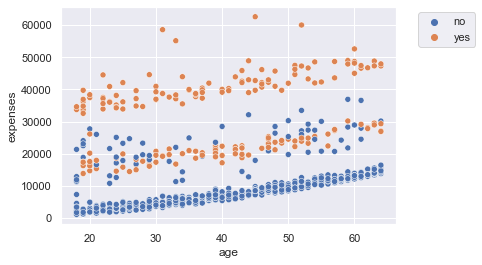

In [18]:
# Average expenses analysis with age and smoker columns
g =sns.scatterplot(x="age", y="expenses", hue="smoker", data=data0, legend='full')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

* For the age-expenses plot we see that smokers tend to pay more than non-smokers but the line slope seems almost the same, implying that the increase of medical expenses with respect to the age is the same for both categories.

* Smoker feature is a strong predictor with the target variable (expenses).

Two different models can be developed for better prediction
* One for non smokers
* Second for smokers

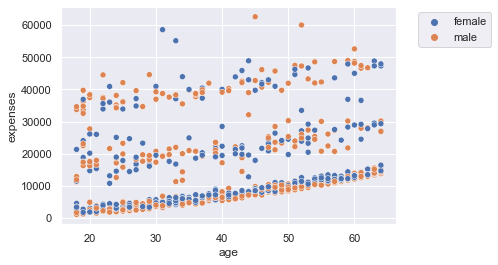

In [19]:
# Average expenses analysis with age and Gender columns
g =sns.scatterplot(x="age", y="expenses", hue="Gender", data=data0, legend='full')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

* For age column, can see linear relationship as by increasing age, the expenses are also increasing.
* The expenses are not much affected with Gender.


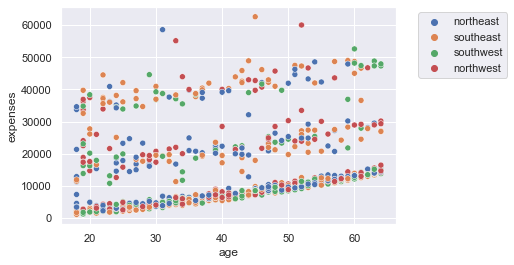

In [20]:
# Average expenses analysis with age and region columns
g =sns.scatterplot(x="age", y="expenses", hue="region", data=data0, legend='full')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

* From above visualizations, we see slight dependency between region and expenses. 
* Southeast region people have slightly more expenses than other regions.


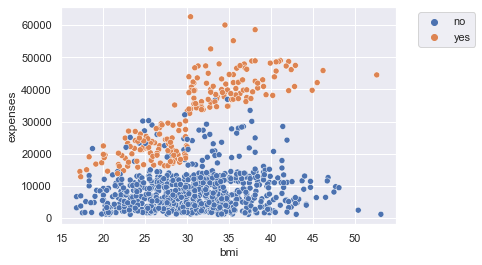

In [21]:
# Average expenses analysis with bmi and smoker columns
g =sns.scatterplot(x="bmi", y="expenses", hue="smoker", data=data0, legend='full')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

* For the bmi-expenses plot we see that smokers tend to pay more than non-smokers.
* Expenses are positively correlated with bmi, where people with higher bmi also tend to pay more in insurance premium. It is a good gauge of your risk for diseases with more bmi.
* People who are smoker and have high BMI are great target for company.

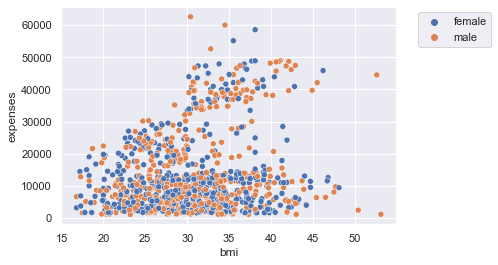

In [22]:
# Average expenses analysis with bmi and smoker columns
g =sns.scatterplot(x="bmi", y="expenses", hue="Gender", data=data0, legend='full')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

* This plot does not show any remarkable information with gender feature but people with high bmi pay more insurance premium.

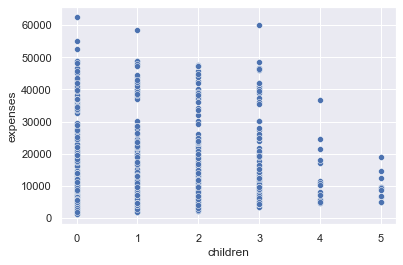

In [23]:
# Expenses analysis with children column
g =sns.scatterplot(x="children", y="expenses", data=data0, legend='full')

* The scatterplot above suggests that people who have less children or no children pay more insurance premium.
* It means people who have no children or less children are more affected by diseases or may be these are smokers.


### 2.3 Null Check

In [24]:
# To count missing values for each variable
data0.isnull().sum()

age         4
Gender      4
bmi         4
children    0
smoker      0
region      3
expenses    0
dtype: int64

* As we can see five columns (age, Gender, bmi, region) contain missing values.
* We can handle missing values by dropping the missing records or by imputing the values.
#### If missing values present in the data
- First Outlier Treatment and then Missing Data Imputation because the outliers will also influence the missing data algorithms in a negative manner.

### 2.4 Outliers Checks
* Only in continuous variables

### Check the skewness of the data
* If the skewness is between -0.5 & 0.5, the data are nearly symmetrical.

* If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed.

* If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed.

In [25]:
data0.skew().sort_values()

age         0.095171
bmi         0.263090
children    0.921720
expenses    1.460681
dtype: float64

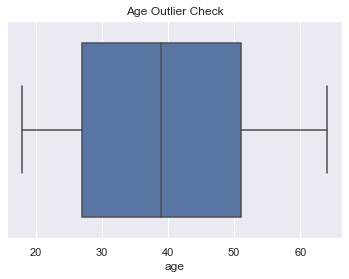

In [26]:
## Box plot --> it is ploted using quntile and inter quntile range(IQR)
## Data outside the vertical lines are considered as outliers
sns.boxplot(x=data0['age'])
plt.title('Age Outlier Check')
plt.show()

There is no outlier present in age column.

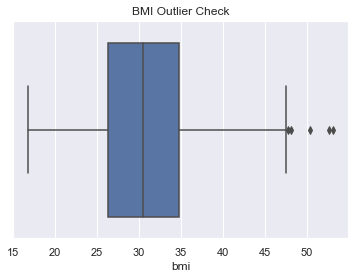

In [27]:
## Box plot --> it is ploted using quntile and inter quntile range(IQR)
## data outside the vertical lines are considered as outliers
sns.boxplot(x=data0['bmi'])
plt.title('BMI Outlier Check')
plt.show()

In [28]:
Qntl1 = data0['bmi'].quantile(0.25)  ## 25% of the customers have bmi less than Qntl1
Qntl3 = data0['bmi'].quantile(0.75)  ## 75% of the customers have bmi less than Qntl3
IQR = Qntl3 -Qntl1
lw_bmi= Qntl1 - 1.5* IQR
up_bmi = Qntl3 + 1.5* IQR
print("Upper bmi:",up_bmi, "Lower bmi:", lw_bmi)
## customers bmi more than upper bound are replaced with upper bound bmi
data0['bmi'] = np.where(data0['bmi']> up_bmi, up_bmi, data0['bmi'])
## customers bmi less than lower bound are replaced with lower bound bmi
data0['bmi'] = np.where(data0['bmi']< lw_bmi, lw_bmi, data0['bmi'])

Upper bmi: 47.58749999999999 Lower bmi: 13.4875


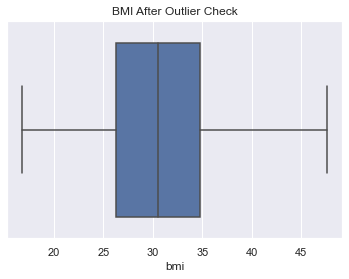

In [29]:
sns.boxplot(x=data0['bmi'])
plt.title('BMI After Outlier Check')
plt.show()

* bmi feature have outliers so we replace these outlier with lower bound (13.4875) and upper bound (47.58) limit by inter quantile method

### NUll Check

In [30]:
data0.isnull().sum()

age         4
Gender      4
bmi         4
children    0
smoker      0
region      3
expenses    0
dtype: int64

### 2.5 Missing Value Imputation

* For Gender: Replace missing values by mode 
* For age: Replace missing values by mean of that Gender
* For bmi: Replace missing values by mean of that region
* For region: Replace missing values by mode


In [31]:
# missing value imputation in region column by mode
data0['region'].fillna(data0['region'].mode().item(), inplace= True)
print(data0['region'].mode())

0    southeast
Name: region, dtype: object


In [32]:
# missing value imputation in Gender column by mode
data0['Gender'].fillna(data0['Gender'].mode().item(), inplace= True)

In [33]:
# missing value imputation in bmi column by mean of region
val_bmi = data0.groupby(['region'])['bmi'].mean()
print(val_bmi)
# missing value imputation in bmi column by mean of region
val_age = data0.groupby(['Gender'])['age'].mean()
print(val_age)
data0['bmi'] = data0.groupby("region")['bmi'].transform(lambda x: x.fillna(x.mean()))
data0['age'] = data0.groupby("Gender")['age'].transform(lambda x: x.fillna(x.mean()))

region
northeast    29.063822
northwest    29.617447
southeast    33.283532
southwest    30.609633
Name: bmi, dtype: float64
Gender
female    39.397802
male      38.641509
Name: age, dtype: float64


In [34]:
print("Null Count: ", data0.isnull().sum().sum())

Null Count:  0


### 2.6 Categorical to Numeric

##### Linear regression model takes only numerical variables
* There are several methods to convert categorical variables into numerical variables. Some are below:
    * One hot encoding
    * Label encoding
    * Ordinal encoding

In [35]:
# categorical variables
for col in categorical_col:
    print(col, " ", data0[col].unique())

Gender   ['female' 'male']
smoker   ['no' 'yes']
region   ['northeast' 'southeast' 'southwest' 'northwest']


In [36]:
# Create a function for conversion of Categorical variables to numeric values
def Cat_toNum(df, col, dep):
    """
    Inputs: 
        df: data frame
        col: independent categorical column name 
        dep: dependent variable column name
        
    Processing: 
        This function replaces categories by average values of respective dependent variables for that category.
        
    Outputs:
        df: dataframe after categorical to numeric conversion
        dict_val: a dictionary of the average value for each category
    """
    dict_val = np.round(df.groupby(col)[dep].mean(), 5)
    cat = list(dict_val.index)
    for i in range(len(cat)):
        print(cat[i])
        df[col] = np.where(df[col]==cat[i],dict_val[cat[i]],df[col])
    return df, dict_val

In [37]:
region = Cat_toNum(data0, 'region', 'expenses')
data0 = region[0]
val_region = region[1]
data0['region'] = data0['region'].astype(float)

northeast
northwest
southeast
southwest


In [38]:
# Variables with two categories
categorical_col = list(data0.select_dtypes(include= 'object'))
for col in categorical_col:
    print(col, " ", data0[col].unique())

Gender   ['female' 'male']
smoker   ['no' 'yes']


In [39]:
# For variable with only two categories, lable encoding is performed (1 for first category and 0 for other)
data0['smoker'] = np.where(data0['smoker']=='yes', 1, 0)
data0['Gender'] = np.where(data0['Gender']=='male', 1, 0)

In [40]:
data0.head(5)

,age,Gender,bmi,children,smoker,region,expenses
0,52.0,0,38.4,2,0,13553.52533,11396.90
1,42.0,1,36.0,2,0,14941.36664,7160.33
2,51.0,0,39.5,1,0,12307.97560,9880.07
3,32.0,1,37.3,1,0,13553.52533,4667.61
4,54.0,1,30.8,1,1,14941.36664,41999.52


# 3. Model Development

Regression is a parametric approach. ‘Parametric’ means it makes "assumptions about data" for the purpose of analysis. Due to its parametric side, regression is restrictive in nature. It fails to deliver good results with data sets which doesn’t fulfill its assumptions. Therefore, for a successful regression analysis, it’s essential to validate these assumptions.

### Important assumptions in regression analysis:
* There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹. An additive relationship suggests that the effect of X¹ on Y is independent of other variables.
* The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.
* There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.
* The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.
* The error terms must be normally distributed.

---

### 3.1 First Assumption :  Linear relationship of dependent variable with each independent variable
#### Pearson Correlation: 
Pearson correlation evaluates the linear relationship between two continuous variables. 
#### Spearman Correlation: 
Spearman correlation evaluates the monotonic relationship. The Spearman correlation coefficient is based on the ranked values (depends on order of variables) for each variable rather than the raw data.

In [41]:
# For numeric variables (Pearson Correlation)
corr = data0[data0.columns].corr()['expenses'].sort_values()
df_corr = pd.DataFrame(corr)
df_corr.columns=['Pearson Correlation']
print(df_corr)
# variables with correlation coefficient more than 0.1 are kept
col1= df_corr[(df_corr['Pearson Correlation']>0.1)|(df_corr['Pearson Correlation']<-0.1)].index
print("Columns with high correlation:",list(col1))

          Pearson Correlation
Gender               0.058900
children             0.067202
region               0.081675
bmi                  0.200366
age                  0.293281
smoker               0.788877
expenses             1.000000
Columns with high correlation: ['bmi', 'age', 'smoker', 'expenses']


### 3.2 Second Assumption: Multicollinearity
To check the multicollinearity we can check the correlation of independent variable with all other independent variables. Two variables with high correlation(>0.3) coefficient tends to have high multicollinearity.
To remove multicollinearity we have to drop any one variable with high correlation.

#### VIF (variance inflation factor)
VIF is more accurate and industry standard to find multicollinearity. It range from 1 to infinite. variables with VIF> 3 or sometimes VIF>5 should not be considered for model development.

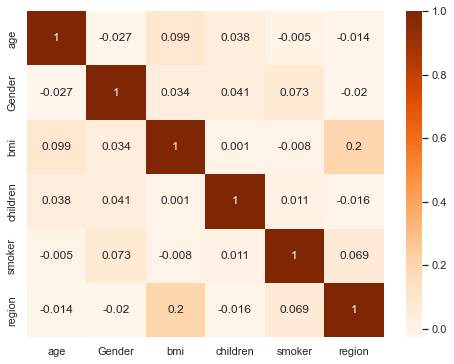

In [42]:
# heatmap of correlation between independent variables
matrix = data0[['age', 'Gender', 'bmi', 'children', 'smoker', 'region']].corr().round(3)
plt.figure(figsize=(8,6))
sns.heatmap(matrix, cmap="Oranges", annot=True)
plt.show()

In [43]:
### X : all the independent variables
### y : dependent variable (Target variable)
X= data0.drop('expenses', axis=1)
y= data0['expenses']

In [44]:
## VIF
df_vif= pd.DataFrame()
df_vif['Variable'] = X.columns
df_vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
df_vif = df_vif.sort_values('VIF')
df_vif.reset_index(drop=True, inplace =True)
df_vif

,Variable,VIF
0,smoker,1.289781
1,children,1.847194
2,Gender,2.052608
3,age,8.557548
4,bmi,27.276929
5,region,32.214310


In [45]:
## Create list of variable with VIF grater than 30
col_del =  df_vif[df_vif['VIF']>30]['Variable'].to_list()
col_del

['region']

In [46]:
## Droping variables with VIF> 30
## Will examin model output and drop high VIF variable
X.drop(columns=col_del, inplace= True)
X.head()

,age,Gender,bmi,children,smoker
0,52.0,0,38.4,2,0
1,42.0,1,36.0,2,0
2,51.0,0,39.5,1,0
3,32.0,1,37.3,1,0
4,54.0,1,30.8,1,1


In [47]:
## VIF
df_vif= pd.DataFrame()
df_vif['Variable'] = X.columns
df_vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
df_vif = df_vif.sort_values('VIF')
df_vif.reset_index(drop=True, inplace =True)
df_vif

,Variable,VIF
0,smoker,1.274377
1,children,1.821209
2,Gender,2.022623
3,age,7.484993
4,bmi,8.621148


Due to limited columns we will processed with VIF<=10 variables

## 4. OLS Model
### Cost Function of linear regression
In linear regression model is fitted Y= a1*x1+a2*x2+a3*x3+c*1  and it try to minimize the RMSE (root mean square error) of predicted variable

In [48]:
## Adding constant in independent variables
## Y= a1*x1+a2*x2+a3*x3+c*1   intercept will multiplie by 1 so it will create column values with 1

In [49]:
X = X[df_vif['Variable'].unique()]
X.head()

,smoker,children,Gender,age,bmi
0,0,2,0,52.0,38.4
1,0,2,1,42.0,36.0
2,0,1,0,51.0,39.5
3,0,1,1,32.0,37.3
4,1,1,1,54.0,30.8


In [50]:
X= sm.add_constant(X)
mod = sm.OLS(y, X).fit()
summary = mod.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     542.2
Date:                Fri, 12 Aug 2022   Prob (F-statistic):          1.17e-272
Time:                        21:21:13   Log-Likelihood:                -9497.0
No. Observations:                 936   AIC:                         1.901e+04
Df Residuals:                     930   BIC:                         1.904e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.263e+04   1170.738    -10.791      0.0

In [51]:
## In the above model output we can see that Gender has p-value grater than 0.05. It show that this variables is not significance
## So we will drop this variable from the model

In [52]:
## Read model output as dataframe
results_as_html = summary.tables[1].as_html()
df_mod = pd.read_html(results_as_html, header=0, index_col=0)[0]
df_mod

,coef,std err,t,P>|t|,[0.025,0.975]
const,-12630.0000,1170.738,-10.791,0.000,-14900.000,-10300.000
smoker,23430.0000,492.269,47.601,0.000,22500.000,24400.000
children,490.4417,170.066,2.884,0.004,156.684,824.200
Gender,10.2366,406.610,0.025,0.980,-787.742,808.216
age,242.2016,14.547,16.649,0.000,213.653,270.751
bmi,358.9679,33.443,10.734,0.000,293.335,424.601


In [53]:
## Creating list of variables p value grater than 0.15 excluding intercept
temp = df_mod.iloc[1:]
var_list = temp[temp['P>|t|']>0.15].index

X.drop(columns=var_list, inplace= True)

In [54]:
mod = sm.OLS(y, X).fit()
summary = mod.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     678.5
Date:                Fri, 12 Aug 2022   Prob (F-statistic):          4.23e-274
Time:                        21:21:13   Log-Likelihood:                -9497.0
No. Observations:                 936   AIC:                         1.900e+04
Df Residuals:                     931   BIC:                         1.903e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.263e+04   1157.439    -10.911      0.0

In [55]:
## Read model output as dataframe
results_as_html = summary.tables[1].as_html()
df_mod = pd.read_html(results_as_html, header=0, index_col=0)[0]
## Model variables
mod_var = df_mod.iloc[1:].index
mod_var

Index(['smoker', 'children', 'age', 'bmi'], dtype='object')

In [56]:
mod_Pred = mod.predict(X)
df0 = pd.concat([y, mod_Pred], axis=1)
df0.columns = ['expenses', 'Pred_expenses']

In [57]:
#### Autocorrelation Test: 
# Durbin-Watson (DW)   
    # DW=2 (No autocorrelation)
    # 0<DW<2 (Positive autocorrelation)
    # 2<DW<4 (Negative autocorrelation )
# Value of DW statistics is 1.98 which is close to 2. So residuals do not have any autocorrelation

In [58]:
## Breuschpagan test for heteroscedasticity
## The null hypothesis (H0): Homoscedasticity is present.
## The alternative hypothesis (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists)

names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(mod.resid, mod.model.exog)
lzip(names, test)

[('Lagrange multiplier statistic', 74.76955548595477),
 ('p-value', 2.229237547351654e-15),
 ('f-value', 20.206687014153914),
 ('f p-value', 5.637084063979155e-16)]

* P value of Lagrange multiplier statistic is less than 0.05 so we reject the Null hypothesis
* It shows that heteroscedasticity exists (Residual do not have constant variance with independent variables)

In [59]:
temp = pd.concat([pd.DataFrame(mod.resid), pd.DataFrame(mod.model.exog)], axis =1)
temp.columns = list(['Resi', 'constant'])+ list(mod_var)
temp.head()

,Resi,constant,smoker,children,age,bmi
0,-3335.265949,1.0,0.0,2.0,52.0,38.4
1,-4288.337549,1.0,0.0,2.0,42.0,36.0
2,-4514.185794,1.0,0.0,1.0,51.0,39.5
3,-4335.238061,1.0,0.0,1.0,32.0,37.3
4,6568.596595,1.0,1.0,1.0,54.0,30.8


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


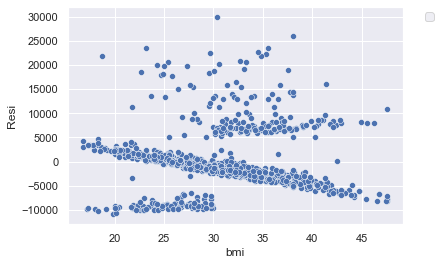

In [60]:
## bmi vs Residual plot
g =sns.scatterplot(x="bmi", y="Resi",
              data=temp, legend='full')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [61]:
# Root mean squared error and R2 Score
RMSE = np.sqrt(metrics.mean_squared_error(y,mod_Pred))
print('RMSE', np.round(RMSE, 3))
print('R2 Score:',np.round(r2_score(y , mod_Pred),3))

RMSE 6169.692
R2 Score: 0.745


### 4.1 Test data

* Do not remove outliers from test data
* It is better to define minimum and maximum values for each variable during the model development and set cap & floor for them

* Missing values in test data should be replaced by same values as train data

In [62]:
### Test data cleaning
data0 = pd.concat([x_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis =1)
print(data0.shape)
data0.head()

(402, 7)


,age,Gender,bmi,children,smoker,region,expenses
0,38.0,male,37.1,1,no,northeast,6079.67
1,20.0,female,28.8,0,no,northeast,2457.21
2,54.0,male,25.5,1,no,northeast,25517.11
3,19.0,female,33.1,0,yes,southeast,34439.86
4,37.0,male,22.7,3,no,northeast,6985.51


In [63]:
### Missing values check 
data0.isnull().sum()

age         2
Gender      0
bmi         0
children    0
smoker      4
region      0
expenses    0
dtype: int64

In [64]:
# missing value imputation 
data0['smoker'].fillna(data0['smoker'].mode().item(), inplace= True)

In [65]:
# missing value imputation in region column by mode
data0['region'].fillna(data0['region'].mode().item(), inplace= True)
print(data0['region'].mode())

0    southeast
Name: region, dtype: object


In [66]:
data0['val_bmi'] = data0['region'].map(val_bmi)
data0['bmi'] = np.where(data0['bmi'], data0['val_bmi'], data0['bmi'])

data0['val_age'] = data0['Gender'].map(val_age)
data0['age'] = np.where(data0['age'], data0['val_age'], data0['age'])
data0 = data0.drop(columns=['val_bmi', 'val_age'])

data0['smoker'] = np.where(data0['smoker']=='yes', 1, 0)
data0.head()

,age,Gender,bmi,children,smoker,region,expenses
0,38.641509,male,29.063822,1,0,northeast,6079.67
1,39.397802,female,29.063822,0,0,northeast,2457.21
2,38.641509,male,29.063822,1,0,northeast,25517.11
3,39.397802,female,33.283532,0,1,southeast,34439.86
4,38.641509,male,29.063822,3,0,northeast,6985.51


In [67]:
x_test = data0[mod_var]
x_test = sm.add_constant(x_test)
y_test = data0['expenses']

In [68]:
expenses_pred_test = mod.predict(x_test)
df0 = pd.concat([y_test, expenses_pred_test], axis=1)
df0.columns = ['expenses', 'expenses_pred_test']

In [69]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test,expenses_pred_test))
print('RMSE', np.round(RMSE,3))
print('R2 Score:',np.round(r2_score(y_test,expenses_pred_test),3))

RMSE 7552.864
R2 Score: 0.594


# 5. Conclusion

For Train data:
    * RMSE: 6169.692
    * R2 Score: 0.745

For Test data:
    * RMSE: 7552.864
    * R2 Score: 0.594

* R Square of Train data is 0.745 but the same model is underperforming with test data and giving R square only 0.594
* It indicates that model is overfitting on train data (able to explain the variance of train data but not able to explain variance of test data)
* This model needs to further investigate to remove overfitting
#### Future Work
* To remove the overfitting, we will perform K fold cross validation and develop the model again
